In [ ]:
!pip install spacy

In [ ]:
import numpy as np
import nltk
nltk.download('words')
nltk.download('punkt_tab')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('maxent_ne_chunker_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
from nltk import word_tokenize, pos_tag, ne_chunk

# sample text
text = "Sachin Tendulkar was born in Mumbai, India on April 24, 1974"

# tokenize the text



tagged_tokens = pos_tag(word_tokenize(text))
tagged_tokens

[('Sachin', 'NNP'),
 ('Tendulkar', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Mumbai', 'NNP'),
 (',', ','),
 ('India', 'NNP'),
 ('on', 'IN'),
 ('April', 'NNP'),
 ('24', 'CD'),
 (',', ','),
 ('1974', 'CD')]

In [ ]:
# pos tagging
tagged_tokens = pos_tag(word_tokenize(text))
tagged_tokens

[('Sachin', 'NNP'),
 ('Tendulkar', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Mumbai', 'NNP'),
 (',', ','),
 ('India', 'NNP'),
 ('on', 'IN'),
 ('April', 'NNP'),
 ('24', 'CD'),
 (',', ','),
 ('1974', 'CD')]

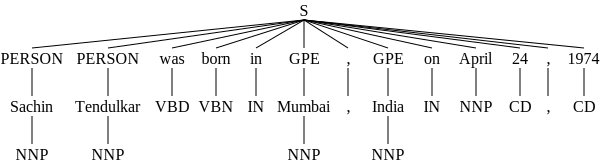

In [ ]:
# perform NER
!pip install svgling
ner_tree = ne_chunk(tagged_tokens)
ner_tree

In [ ]:
ner_tree.pos()

[(('Sachin', 'NNP'), 'PERSON'),
 (('Tendulkar', 'NNP'), 'PERSON'),
 (('was', 'VBD'), 'S'),
 (('born', 'VBN'), 'S'),
 (('in', 'IN'), 'S'),
 (('Mumbai', 'NNP'), 'GPE'),
 ((',', ','), 'S'),
 (('India', 'NNP'), 'GPE'),
 (('on', 'IN'), 'S'),
 (('April', 'NNP'), 'S'),
 (('24', 'CD'), 'S'),
 ((',', ','), 'S'),
 (('1974', 'CD'), 'S')]

In [ ]:
for i in ner_tree.pos():
  if i[1] != 'S':
    print(i[0][0],i[1])

Sachin PERSON
Tendulkar PERSON
Mumbai GPE
India GPE


### NER using spacy

In [ ]:
import spacy

In [ ]:
!python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 40.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
sent = nlp('''Mark Zukerberg will meet Aditya Joshi in New York, USA
on Monday 21, 2024 4pm for $3 Trillion deal. ''')

In [ ]:
sent

Mark Zukerberg will meet Aditya Joshi in New York, USA
on Monday 21, 2024 4pm for $3 Trillion deal. 

In [ ]:
sent.ents

(Mark Zukerberg, Aditya Joshi, New York, USA, Monday 21, 2024 4, $3 Trillion)

In [ ]:
for word in sent.ents:
  print(word.ents[0],'-->', word.label_)

Mark Zukerberg --> PERSON
Aditya Joshi --> PERSON
New York --> GPE
USA --> GPE
Monday 21, 2024 4 --> DATE
$3 Trillion --> MONEY


In [ ]:
for word in sent.ents:
  print(word.text,'-->', word.label_)

Mark Zukerberg --> PERSON
Aditya Joshi --> PERSON
New York --> GPE
USA --> GPE
Monday 21, 2024 4 --> DATE
$3 Trillion --> MONEY


In [ ]:
sent = nlp(text)

In [ ]:
sent.ents

(Sachin Tendulkar, Mumbai, India, April 24, 1974)

In [ ]:
for word in sent.ents:
  print(word.ents[0],'-->',word.label)

Sachin Tendulkar --> 380
Mumbai --> 384
India --> 384
April 24, 1974 --> 391


In [ ]:
spacy.explain('PERSON')

'People, including fictional'

In [ ]:
raw_text = nlp('''
Indigenous people have lived in Alaska for thousands of years, and it is widely believed that the region served as the entry point for the initial settlement of North America by way of the Bering land bridge. The Russian Empire was the first to actively colonize the area beginning in the 18th century, eventually establishing Russian America, which spanned most of the current state and promoted and maintained a native Alaskan Creole population.[7] The expense and logistical difficulty of maintaining this distant possession prompted its sale to the U.S. in 1867 for US$7.2 million (equivalent to $157 million in 2023). The area went through several administrative changes before becoming organized as a territory on May 11, 1912. It was admitted as the 49th state of the U.S. on January 3, 1959.
''')

In [ ]:
raw_text

 


Indigenous people have lived in Alaska for thousands of years, and it is widely believed that the region served as the entry point for the initial settlement of North America by way of the Bering land bridge. The Russian Empire was the first to actively colonize the area beginning in the 18th century, eventually establishing Russian America, which spanned most of the current state and promoted and maintained a native Alaskan Creole population.[7] The expense and logistical difficulty of maintaining this distant possession prompted its sale to the U.S. in 1867 for US$7.2 million (equivalent to $157 million in 2023). The area went through several administrative changes before becoming organized as a territory on May 11, 1912. It was admitted as the 49th state of the U.S. on January 3, 1959.

In [ ]:
raw_text.ents

(Alaska,
 thousands of years,
 North America,
 The Russian Empire,
 first,
 the 18th century,
 Russian America,
 Alaskan,
 U.S.,
 1867,
 US$7.2 million,
 $157 million,
 2023,
 May 11, 1912,
 49th,
 U.S.,
 January 3, 1959)

In [ ]:
for word in raw_text.ents:
  print(word.ents[0],'-->',word.label_)

Alaska --> GPE
thousands of years --> DATE
North America --> LOC
The Russian Empire --> GPE
first --> ORDINAL
the 18th century --> DATE
Russian America --> LOC
Alaskan --> NORP
U.S. --> GPE
1867 --> DATE
US$7.2 million --> MONEY
$157 million --> MONEY
2023 --> DATE
May 11, 1912 --> DATE
49th --> ORDINAL
U.S. --> GPE
January 3, 1959 --> DATE


#### explain: to explain entities

In [ ]:
spacy.explain('GPE')

'Countries, cities, states'

In [ ]:
spacy.explain('ORG')

'Companies, agencies, institutions, etc.'

#### Display NER in interactive way

In [ ]:
from spacy import displacy

In [ ]:
displacy.render(raw_text, style = 'ent',jupyter=True)